In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [6]:
housing = pd.read_excel('clean_housing.xlsx')
education = pd.read_excel('clean_education.xlsx')

In [13]:
housing_percent = housing.groupby("region_name")["percent"].mean()
housing_percent

region_name
Bay Area                      18.696276
Butte                         18.358014
Central/Southeast Sierra      16.983391
Monterey Bay                  20.007936
North Coast                   19.637816
Northeast Sierra              18.869800
Northern Sacramento Valley    19.057349
Sacramento Area               17.895334
San Diego                     21.620399
San Joaquin Valley            17.031642
San Luis Obispo               17.020392
Santa Barbara                 17.733070
Shasta                        14.436083
Southern California           20.568798
Name: percent, dtype: float64

In [15]:
education_estimate = education.groupby("region_name")["estimate"].mean()
education_estimate

region_name
Bay Area                      41.161795
Butte                         21.531943
Central/Southeast Sierra      21.814115
Monterey Bay                  28.898325
North Coast                   21.423629
Northeast Sierra              20.796532
Northern Sacramento Valley    13.022114
Sacramento Area               27.951700
San Diego                     31.777172
San Joaquin Valley            14.867877
San Luis Obispo               30.294865
Santa Barbara                 31.193394
Shasta                        20.144705
Southern California           27.681319
Name: estimate, dtype: float64

In [23]:
estimation = pd.concat([housing_percent, education_estimate], axis=1).rename(columns={"percent": "housing_percent", "estimate": "education_estimate"})
estimation

,housing_percent,education_estimate
region_name,,
Bay Area,18.696276,41.161795
Butte,18.358014,21.531943
Central/Southeast Sierra,16.983391,21.814115
Monterey Bay,20.007936,28.898325
North Coast,19.637816,21.423629
Northeast Sierra,18.869800,20.796532
Northern Sacramento Valley,19.057349,13.022114
Sacramento Area,17.895334,27.951700
San Diego,21.620399,31.777172


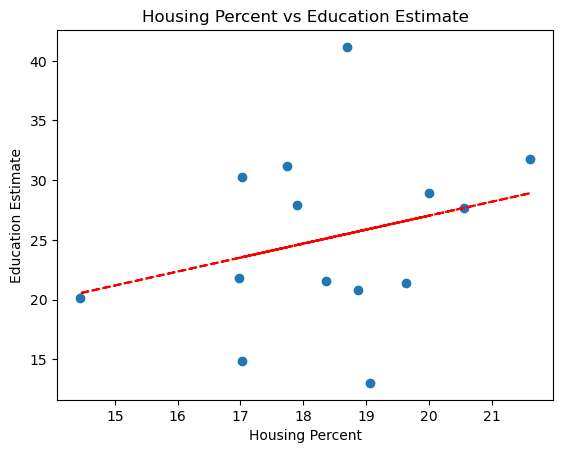

In [27]:
plt.scatter(estimation["housing_percent"], estimation["education_estimate"])
plt.xlabel("Housing Percent")
plt.ylabel("Education Estimate")
plt.title("Housing Percent vs Education Estimate")
z = np.polyfit(estimation["housing_percent"], estimation["education_estimate"], 1)
p = np.poly1d(z)
plt.plot(estimation["housing_percent"],p(estimation["housing_percent"]),"r--")